In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
cf.go_offline(connected = True)
%matplotlib inline

# Data Analysis and Visualisation: Kickstarter Projects 2018

## Introduction and Description of a dataset

# Dataset Optimisation and Cleaning

In [2]:
df = pd.read_csv('../010_data_vis/Data/ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
print(df.shape)
print(df.columns)

(378661, 15)
Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


In [4]:
df.describe().style.highlight_max()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.000000,378661.000000,378661.000000,378661.000000,374864.000000,378661.000000,378661.000000
mean,1074731191.988755,49080.791521,9682.979339,105.617476,7036.728867,9058.924074,45454.401465
std,619086204.322627,1183391.259093,95636.010005,907.185035,78639.745308,90973.343107,1152950.055088
min,5971.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,538263516.000000,2000.000000,30.000000,2.000000,16.980000,31.000000,2000.000000
50%,1075275634.000000,5200.000000,620.000000,12.000000,394.720000,624.330000,5500.000000
75%,1610148624.000000,16000.000000,4076.000000,56.000000,3034.090000,4050.000000,15500.000000
max,2147476221.000000,100000000.000000,20338986.270000,219382.000000,20338986.270000,20338986.270000,166361390.710000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


## Change `deadline` and `launched` to date_time 

In [6]:
print(type(df['deadline'][0]))
print(type(df['launched'][0]))

<class 'str'>
<class 'str'>


In [7]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])

In [8]:
print(type(df['deadline'][0]))
print(type(df['launched'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Data optimisation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd pledged       374864 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

In [10]:
df.notna().count()

ID                  378661
name                378661
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         378661
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

### Find categorical data and change it  `.astype('category)`
- Categorical data seems to be:
    - category
    - main_category
    - currency
    - state
    - country
- Before data optimisation memory usage is 43,3 MB

In [11]:
print(f'Different categories:\t\t {len(df.category.value_counts())}')
print(f'Different main categories:\t  {len(df.main_category.value_counts())}')
print(f'Different currencies:\t\t  {len(df.currency.value_counts())}')
print(f'Different states:\t\t  {len(df.state.value_counts())}')
print(f'Different countries:\t\t  {len(df.country.value_counts())}')

Different categories:		 159
Different main categories:	  15
Different currencies:		  14
Different states:		  6
Different countries:		  23


In [12]:
df['category'] = df['category'].astype('category')
df['main_category'] = df['main_category'].astype('category')
df['currency'] = df['currency'].astype('category')
df['state'] = df['state'].astype('category')
df['country'] = df['country'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  category      
 3   main_category     378661 non-null  category      
 4   currency          378661 non-null  category      
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  category      
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  category      
 12  usd pledged       374864 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

- after optimisation memory usage dropt from 43.3 MB to 31.1 MB (more than 22% improvement)

In [14]:
df.isna().count()

ID                  378661
name                378661
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         378661
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

### Drop not necessary columns

In [15]:
df.head(1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95


In [16]:
df.drop(columns = ['ID', 'currency', 'pledged', 'usd pledged', 'goal'], inplace = True)

In [17]:
df

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,2014-10-17,2014-09-17 02:35:30,canceled,1,US,25.0,50000.00
378657,The Tribe,Narrative Film,Film & Video,2011-07-19,2011-06-22 03:35:14,failed,5,US,155.0,1500.00
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,2010-08-16,2010-07-01 19:40:30,failed,1,US,20.0,15000.00
378659,BioDefense Education Kit,Technology,Technology,2016-02-13,2016-01-13 18:13:53,failed,6,US,200.0,15000.00


### Drop usless values

In [18]:
df = df[df.launched.dt.year != 1970]
df = df[df.state != 'live']
df = df[df.state != 'canceled']
df = df[df.state != 'undefined']
df = df[df.state != 'suspended']

In [19]:
df.head()

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
5,Monarch Espresso Bar,Restaurants,Food,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.00


In [20]:
df.state.unique()

['failed', 'successful']
Categories (2, object): ['failed', 'successful']

# Data Analysis
Workflow:

- Questions of Interest:
    - Pandas Analysis
    - Visualisation
    - Conclusions
    - Follow up question?


In [21]:
df.head(1)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95


## Basic Analysis

### Goal in USD

In [22]:
df.usd_goal_real.describe()

count    3.316750e+05
mean     4.151000e+04
std      1.108930e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

In [23]:
print(f'Min Goal in USD: {df.usd_goal_real.min()}')
print(f'Max Goal in USD: {df.usd_goal_real.max()}')
print(f'Mean Goal in USD: {df.usd_goal_real.mean()}')
print(f'Std Goal in USD: {df.usd_goal_real.std()}')

Min Goal in USD: 0.01
Max Goal in USD: 166361390.71
Mean Goal in USD: 41510.00154283584
Std Goal in USD: 1108929.6630866537


### Pledged in USD

In [24]:
df.usd_pledged_real.describe()

count    3.316750e+05
mean     9.943461e+03
std      9.673293e+04
min      0.000000e+00
25%      5.000000e+01
50%      7.880000e+02
75%      4.608000e+03
max      2.033899e+07
Name: usd_pledged_real, dtype: float64

In [25]:
print(f'Min Pledged in USD: {df.usd_pledged_real.min()}')
print(f'Max Pledged in USD: {df.usd_pledged_real.max()}')
print(f'Mean Pledged in USD: {df.usd_pledged_real.mean()}')
print(f'Std Pledged in USD: {df.usd_pledged_real.std()}')

Min Pledged in USD: 0.0
Max Pledged in USD: 20338986.27
Mean Pledged in USD: 9943.46125586822
Std Pledged in USD: 96732.93417471698


### Backers

In [26]:
df.backers.describe()

count    331675.000000
mean        116.381581
std         965.427268
min           0.000000
25%           2.000000
50%          15.000000
75%          63.000000
max      219382.000000
Name: backers, dtype: float64

### Distribution of `States`

In [27]:
df['state'].unique()

['failed', 'successful']
Categories (2, object): ['failed', 'successful']

In [28]:
df.state.value_counts()

failed        197719
successful    133956
undefined          0
suspended          0
live               0
canceled           0
Name: state, dtype: int64

In [29]:
px.bar(df.state.value_counts(), title = 'Distribution of States')

## Distrbituion of main categories

In [30]:
main_categories_count = df.main_category.value_counts()

In [31]:
px.pie(df, names = df.main_category.value_counts().index, values = df.main_category.value_counts().values,
      title = 'Categories by popularity')

In [32]:
px.bar(main_categories_count, title = 'Distrbituion of main categories')

From the chart we can see that the most popular main category is 'Film & Video' followed by 'Music'.

## Distribution of top 20 categories

In [33]:
categories_count = df.category.value_counts().head(20)

In [34]:
px.bar(categories_count, title = 'Distrbituion of top 20 categories')

From the chart we can see that the most popular category is 'Product Design' by more than 5,000 counts. Followed by 'Documentary', 'Music' and 'Tabletop Games'.

## Distribution of countries

In [35]:
df.country.value_counts().rename('All projects')

US      261360
GB       29454
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       210
LU          57
JP          23
Name: All projects, dtype: int64

In [36]:
px.bar(df.country.value_counts(), title = 'Projects by countries')

### Successful projects by countries

In [37]:
df[df.state == 'successful'].country.value_counts().rename('Successful')

US      109299
GB       12067
CA        4134
AU        2010
DE         937
FR         908
NL         617
SE         509
ES         492
NZ         448
IT         439
MX         396
DK         360
HK         216
IE         207
CH         187
SG         178
NO         162
BE         152
AT         107
N,0"       105
LU          19
JP           7
Name: Successful, dtype: int64

In [38]:
px.bar(df[df.state == 'successful'].country.value_counts(), title = 'Successful projects by countries')

In [39]:
df_sf_by_country = pd.DataFrame([df.country.value_counts(), df[df.state == 'successful'].country.value_counts()]).transpose()

In [40]:
df_sf_by_country.columns = ['All projects', 'Successful projects']
df_sf_by_country.rename_axis(index = 'Country')

,All projects,Successful projects
Country,,
AT,485,107
AU,6616,2010
BE,523,152
CA,12370,4134
CH,652,187
DE,3436,937
DK,926,360
ES,1873,492
FR,2520,908


In [41]:
df_sf_by_country = df_sf_by_country.rename_axis(index = 'Country')
df_sf_by_country.sort_values(by = 'All projects', ascending = False, inplace = True)

In [42]:
px.bar(df_sf_by_country)

In [43]:
df_sf_by_country.head(3)

,All projects,Successful projects
Country,,
US,261360,109299
GB,29454,12067
CA,12370,4134


### Percentage of success by country

In [44]:
df_sf_by_country['Percentage'] = df_sf_by_country['Successful projects'] / df_sf_by_country['All projects'] * 100 
df_sf_by_country.head()

,All projects,Successful projects,Percentage
Country,,,
US,261360,109299,41.819330
GB,29454,12067,40.968969
CA,12370,4134,33.419563
AU,6616,2010,30.380895
DE,3436,937,27.270081


In [45]:
df_sf_by_country.sort_values(by = 'Percentage', ascending = False)

,All projects,Successful projects,Percentage
Country,,,
"N,0""",210,105,50.000000
HK,477,216,45.283019
US,261360,109299,41.819330
GB,29454,12067,40.968969
SG,454,178,39.207048
DK,926,360,38.876890
FR,2520,908,36.031746
NZ,1274,448,35.164835
SE,1509,509,33.730948


In [46]:
s_percent_success = df_sf_by_country['Percentage']
s_percent_success = s_percent_success.sort_values(ascending= False).drop('N,0"')

In [47]:
s_percent_success

Country
HK    45.283019
US    41.819330
GB    40.968969
SG    39.207048
DK    38.876890
FR    36.031746
NZ    35.164835
SE    33.730948
CA    33.419563
LU    33.333333
JP    30.434783
AU    30.380895
IE    30.307467
BE    29.063098
CH    28.680982
MX    28.065202
NO    27.835052
DE    27.270081
ES    26.268019
NL    25.591041
AT    22.061856
IT    18.531026
Name: Percentage, dtype: float64

In [48]:
px.bar(s_percent_success.sort_values(ascending= False), title = 'Success % by country')

In [49]:
s_percent_success.describe()

count    22.000000
mean     31.923872
std       6.627344
min      18.531026
25%      27.892589
50%      30.407839
75%      35.815018
max      45.283019
Name: Percentage, dtype: float64

## Distribution of top 20 categories

In [50]:
successful_df = df[df.state == 'successful']
successful_df.head(2)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
5,Monarch Espresso Bar,Restaurants,Food,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.0
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,2014-12-21,2014-12-01 18:30:44,successful,16,US,1205.0,1000.0


### Successful

In [51]:
successful_s = successful_df.main_category.value_counts().rename('Successful')
successful_s

Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: Successful, dtype: int64

In [52]:
px.bar(successful_df.main_category.value_counts(), title = 'Successful projects')

### Failed

In [53]:
failed_df = df[df.state == 'failed']
failed_df.head(2)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00


In [54]:
failed_s = failed_df.main_category.value_counts().rename('Failed')
failed_s

Film & Video    32904
Publishing      23145
Music           21752
Technology      20616
Games           16003
Food            15969
Design          14814
Fashion         14182
Art             14131
Photography      6384
Crafts           5703
Comics           4036
Theater          3708
Journalism       3137
Dance            1235
Name: Failed, dtype: int64

In [55]:
px.bar(failed_df.main_category.value_counts(), title = 'Failed projects')

### Successful vs failed by main category graph

In [56]:
fail_suc_df = pd.DataFrame(data = [failed_s, successful_s]).transpose().sort_values(by = 'Successful', ascending= False)
fail_suc_df

,Failed,Successful
Music,21752,24197
Film & Video,32904,23623
Games,16003,12518
Publishing,23145,12300
Art,14131,11510
Design,14814,10550
Theater,3708,6534
Technology,20616,6434
Food,15969,6085
Comics,4036,5842


In [57]:
fig = go.Figure(data = [
    go.Bar(name = 'Successful', x = fail_suc_df.index, y = fail_suc_df.Successful),
    go.Bar(name = 'Failed', x = fail_suc_df.index, y = fail_suc_df.Failed),
])

fig.update_layout(barmode = 'group')
fig.show()

In [58]:
fail_suc_df['Success Ratio'] = fail_suc_df.Successful / fail_suc_df.Failed 
fail_suc_df.sort_values(by = 'Success Ratio', ascending= False, inplace = True)

In [59]:
px.bar(fail_suc_df['Success Ratio'], title = 'Success / Fail Ratio')

## Projects By Date (Year)

In [60]:
df.launched.dt.year.unique()

array([2015, 2017, 2013, 2012, 2016, 2014, 2010, 2011, 2009])

In [61]:
df['launch_year'] = df['launched'].dt.year

/Users/marukas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



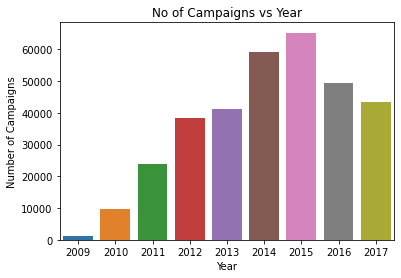

In [62]:
fig = sns.countplot(df.launch_year)
plt.xlabel("Year")
plt.ylabel("Number of Campaigns")
plt.title("No of Campaigns vs Year")
plt.show(fig)

## USD Pledged by category

In [63]:
df.usd_pledged_real.mean()

9943.46125586822

In [64]:
df.head(2)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,launch_year
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,2015
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,2017


In [65]:
pledged_by_category = df[['usd_pledged_real', 'main_category']].groupby('main_category').mean().sort_values('usd_pledged_real', ascending = False)
pledged_by_category

,usd_pledged_real
main_category,
Design,27804.649310
Games,25071.629005
Technology,23976.725832
Comics,7147.216339
Film & Video,6714.662277
Fashion,6355.439923
Food,5567.314935
Theater,4165.408094
Music,4161.739273


In [66]:
px.bar(pledged_by_category)

In [67]:
goal_by_category = df[['usd_goal_real', 'main_category']].groupby('main_category').mean().sort_values('usd_goal_real', ascending = False)
goal_by_category

,usd_goal_real
main_category,
Technology,98076.542810
Film & Video,76095.905349
Journalism,70098.390287
Food,48167.924774
Art,39432.140712
Games,38945.844348
Design,38236.994683
Theater,23133.028563
Fashion,21886.660192


In [68]:
px.bar(goal_by_category)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb96c6b33d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb96c6b3c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb969ede760>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb96c2903a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb96c290730>],
 'means': []}

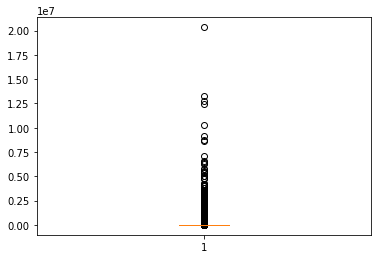

In [72]:
plt.boxplot(df['usd_pledged_real'])

In [69]:
## Most used word in project name??

# Juodrastis

In [70]:
df[['main_category', 'category']]

,main_category,category
0,Publishing,Poetry
1,Film & Video,Narrative Film
2,Film & Video,Narrative Film
3,Music,Music
5,Food,Restaurants
...,...,...
378654,Food,Small Batch
378657,Film & Video,Narrative Film
378658,Film & Video,Narrative Film
378659,Technology,Technology


In [71]:
by_category = df.set_index(['main_category', 'category'])
sorted_categories = by_category.sort_index()
sorted_categories

name  \
main_category category                                                      
Art           Art       SkateFrames-Photo frame made from recycled ska...   
              Art                           TO RUSSIA WITH LOVE AND SIMON   
              Art                                                Carriage   
              Art                                          Project U-Neek   
              Art                 Pierced Hearts Tattoo Boutique Start Up   
...                                                                   ...   
Theater       Theater   The Next Fairy Tale: A New Musical! by Brian P...   
              Theater   Theme Park Diva 2012 Orlando Fringe Cast Recor...   
              Theater              Cornerstone Theatre Cabaret Fundraiser   
              Theater                             Connections the Musical   
              Theater   Actors Shakespeare Company at NJCU: Season of ...   

                         deadline            launched       state  backers  \
main_category category                                                       
Art           Art      2015-05-08 2015-04-08 02:53:18      failed        3   
              Art      2016-06-22 2016-05-23 18:10:04      failed        8   
              Art      2017-12-24 2017-11-24 18:06:35  successful      121   
              Art      2013-05-08 2013-04-08 01:06:32  successful       19   
              Art      2015-05-13 2015-03-14 12:40:11      failed        0   
...                           ...                 ...         ...      ...   
Theater       Theater  2010-12-26 2010-11-11 02:59:36  successful       34   
              Theater  2012-10-21 2012-09-21 18:59:39      failed       29   
              Theater  2016-01-31 2016-01-01 21:00:19      failed        1   
              Theater  2012-11-24 2012-10-25 04:52:16  successful       58   
              Theater  2012-02-11 2011-12-13 20:55:02  successful       89   

                       country  usd_pledged_real  usd_goal_real  launch_year  
main_category category                                                        
Art           Art           US              3.00        7500.00         2015  
              Art           US            587.00        5000.00         2016  
              Art           US           8360.00        8000.00         2017  
              Art           GB           2331.32        2307.48         2013  
              Art           US              0.00        5000.00         2015  
...                        ...               ...            ...          ...  
Theater       Theater       US           4006.00        2500.00         2010  
              Theater       US           1400.00        5000.00         2012  
              Theater       US             10.00         500.00         2016  
              Theater       US          25661.00       25500.00         2012  
              Theater       US          11100.00       10000.00         2011  

[331675 rows x 9 columns]